<a href="https://colab.research.google.com/github/mitalimohurle28-ops/water_pollution_detection_CNN/blob/main/Copy_of_Water_pollution_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/kabeer2004/water-pollution-images
License(s): GPL-2.0
water-pollution-images.zip: Skipping, found more recently modified local copy (use --force to force download)
waterpollution
Removed corrupted file: data/waterpollution/clean/image_116.jpg
Found 234 images belonging to 2 classes.
Found 58 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
4/8 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8080 - loss: 0.3681   

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8821 - loss: 0.2260 - val_accuracy: 1.0000 - val_loss: 2.5347e-25
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 1.0000 - loss: 4.9039e-30 - val_accuracy: 1.0000 - val_loss: 5.8518e-37
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 1.0000 - loss: 1.5710e-35 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 1.0000 - loss: 2.2657e-33 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 1.0000 - loss: 6.8736e-29 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 1.0000 - loss: 2.3730e-32 - val

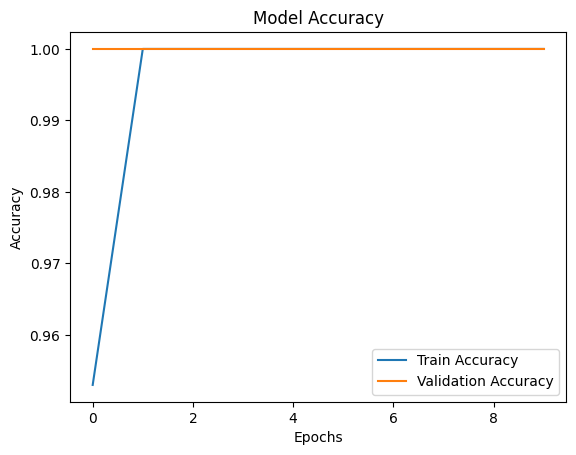

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 510ms/step - accuracy: 1.0000 - loss: 0.0000e+00

✅ Validation Accuracy: 100.00%


FileNotFoundError: [Errno 2] No such file or directory: 'data/waterpollution/dirty/image_000.jpg'

In [ ]:
# ============================
# 🌊 Water Pollution Detection using CNN
# ============================

# STEP 1️⃣: Install & Import Libraries
!pip install kaggle tensorflow matplotlib

import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
import shutil

# STEP 2️⃣: Setup Kaggle Dataset Access
# Upload your kaggle.json file (from your Kaggle account > API > Create new token)
from google.colab import files
files.upload()

# Make Kaggle folder
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# STEP 3️⃣: Download Dataset from Kaggle
!kaggle datasets download -d kabeer2004/water-pollution-images

# STEP 4️⃣: Unzip Dataset
with zipfile.ZipFile("water-pollution-images.zip","r") as zip_ref:
    zip_ref.extractall("data")

# Check the folder
!ls data

# STEP 5️⃣: Organize Data into Subdirectories
base_dir = "data/waterpollution"
dirty_dir = os.path.join(base_dir, 'dirty')
clean_dir = os.path.join(base_dir, 'clean')

os.makedirs(dirty_dir, exist_ok=True)
os.makedirs(clean_dir, exist_ok=True)

# Filter out unsupported image formats like .webp
supported_formats = ('.jpg', '.jpeg', '.png', '.JPG')

for filename in os.listdir(base_dir):
    if filename.lower().endswith(supported_formats):
        if 'dirty' in filename.lower():
            shutil.move(os.path.join(base_dir, filename), os.path.join(dirty_dir, filename))
        else:
            shutil.move(os.path.join(base_dir, filename), os.path.join(clean_dir, filename))

# Remove the corrupted image file
corrupted_file = "data/waterpollution/clean/image_116.jpg"
if os.path.exists(corrupted_file):
    os.remove(corrupted_file)
    print(f"Removed corrupted file: {corrupted_file}")


# STEP 6️⃣: Data Preprocessing (Train/Test Split)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_set = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_set = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# STEP 7️⃣: Build CNN Model
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

# STEP 8️⃣: Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# STEP 9️⃣: Train the Model
history = model.fit(
    train_set,
    validation_data=val_set,
    epochs=10
)

# STEP 🔟: Plot Accuracy Graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# STEP 1️⃣1️⃣: Evaluate Model
val_loss, val_acc = model.evaluate(val_set)
print(f"\n✅ Validation Accuracy: {val_acc*100:.2f}%")

# STEP 1️⃣2️⃣: Test with a Single Image
import numpy as np
from tensorflow.keras.preprocessing import image

sample_img = "data/waterpollution/dirty/image_000.jpg"  # change file path if needed
img = image.load_img(sample_img, target_size=(128,128))
plt.imshow(img)
plt.axis('off')
plt.title("Test Image")

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) / 255.0
prediction = model.predict(x)

if prediction[0][0] > 0.5:
    print("\n🌊 Predicted: Polluted Water")
else:
    print("\n💧 Predicted: Clean Water")

In [ ]:
!ls data/waterpollution/dirty

In [ ]:
import os
from PIL import Image

base_dir = "data/waterpollution"

for root, _, files in os.walk(base_dir):
    for file in files:
        filepath = os.path.join(root, file)
        try:
            img = Image.open(filepath)
            img.verify()  # Verify if it is indeed an image
            img.close()
        except Exception as e:
            print(f"Error opening or verifying image: {filepath} - {e}")

print("Image verification complete.")

Error opening or verifying image: data/waterpollution/clean/image_116.jpg - cannot identify image file 'data/waterpollution/clean/image_116.jpg'
Image verification complete.


In [ ]:
!ls data/waterpollution
!ls data/waterpollution/dirty
!ls data/waterpollution/clean

158166053-H-1024x700.webp  image_098.jpg  image_197.jpg
image_000.jpg		   image_099.jpg  image_198.jpg
image_001.jpg		   image_100.jpg  image_199.jpeg
image_002.jpeg		   image_101.jpg  image_200.jpg
image_003.jpg		   image_102.jpg  image_201.jpg
image_004.jpg		   image_103.jpg  image_202.jpg
image_005.jpg		   image_104.jpg  image_203.jpg
image_006.png		   image_105.jpg  image_204.jpg
image_007.jpg		   image_106.jpg  image_205.jpg
image_008.jpg		   image_107.jpg  image_206.jpg
image_009.jpg		   image_108.jpg  image_207.jpg
image_010.jpg		   image_109.jpg  image_208.png
image_011.jpg		   image_110.jpg  image_209.jpg
image_012.jpg		   image_111.jpg  image_210.jpg
image_013.jpg		   image_112.jpg  image_211.jpg
image_014.jpg		   image_113.jpg  image_212.jpg
image_015.jpg		   image_114.jpg  image_213.jpg
image_016.jpg		   image_115.jpg  image_214.jpg
image_017.jpg		   image_116.jpg  image_215.jpg
image_018.jpg		   image_117.jpg  image_216.jpg
image_019.jpg		   image_118.jpg  image_217.jpg
im